In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import sys, os
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'])
from rayleigh_diagnostics import *
from common import *
from plotcommon import *
from constants import *

In [2]:
dirname = '/nobackup/lmatilsk/case_M/'
#dirname = '/altair/loma3853/public/case_M/'
di_grid = get_grid_info(dirname)
rr = di_grid['rr']/rsun
rmin = np.min(rr)
rmax = np.max(rr)
tw_2d = di_grid['tw_2d']

In [3]:
datadir = dirname + '/data/'

the_file = get_widest_range_file(datadir, 'Shell_Avgs') # rbcz = ACTUAL rbcz = 0.72 rsun
#the_file = the_file.replace()
print ('reading ' + the_file)
di = get_dict(the_file)
vals = di['vals']
lut = di['lut']
prot = compute_Prot(dirname)

reading /nobackup/lmatilsk/case_M//data/Shell_Avgs-07802500_50222500.pkl


In [4]:
# get induction and diffusion terms

# total production
fact = 1/(4*np.pi)

indr = vals[:, 0, lut[2201]]*fact
indt = vals[:, 0, lut[2202]]*fact
indp = vals[:, 0, lut[2203]]*fact

diffr = vals[:, 0, lut[2213]]*fact
difft = vals[:, 0, lut[2214]]*fact
diffp = vals[:, 0, lut[2215]]*fact

# mean shear production of phi
indp_ms = (vals[:, 0, lut[2218]] + vals[:, 0, lut[2242]])*fact

# r prod, shear and comp
indr_shear = vals[:, 0, lut[2304]]*fact
indr_comp = vals[:, 0, lut[2310]]*fact
indr_adv = vals[:, 0, lut[2307]]*fact

# theta prod, shear and comp
indt_shear = vals[:, 0, lut[2305]]*fact
indt_comp = vals[:, 0, lut[2311]]*fact
indt_adv = vals[:, 0, lut[2308]]*fact

# phi prod, shear comp and adv
indp_shear = vals[:, 0, lut[2306]]*fact
indp_comp = vals[:, 0, lut[2312]]*fact
indp_adv = vals[:, 0, lut[2309]]*fact

# theta prod, shear and comp, broken up more
indt_shear1 = vals[:, 0, lut[2402]]*fact
indt_shear2 = vals[:, 0, lut[2405]]*fact

indt_comp1 = vals[:, 0, lut[2417]]*fact
indt_comp2 = vals[:, 0, lut[2420]]*fact

indr_adv1 = vals[:, 0, lut[2407]]*fact
indr_adv2 = vals[:, 0, lut[2410]]*fact
indr_adv3 = vals[:, 0, lut[2413]]*fact

indt_adv1 = vals[:, 0, lut[2408]]*fact
indt_adv2 = vals[:, 0, lut[2411]]*fact
indt_adv3 = vals[:, 0, lut[2414]]*fact

indp_adv1 = vals[:, 0, lut[2409]]*fact
indp_adv2 = vals[:, 0, lut[2412]]*fact
indp_adv3 = vals[:, 0, lut[2415]]*fact

In [5]:
# this isn't REALLY the mean shear term as I defined it (should use the time averaged omega, not instantaneous 
# <v_\phi / r sintheta)
# I think I can get the actual mean shear though
the_file = get_widest_range_file(datadir, 'AZ_Avgs') # rbcz = ACTUAL rbcz = 0.72 rsun
#the_file = the_file.replace()
print ('reading ' + the_file)
di_az = get_dict(the_file)
vals_az = di_az['vals']
lut_az = di_az['lut']
np.sum(lut_az==lut)

reading /nobackup/lmatilsk/case_M//data/AZ_Avgs-07802500_50220000.pkl


4000

In [6]:
print(np.shape(di_grid['rr_2d']))
print(np.shape(di_grid['sint_2d']))
print(np.shape(di_grid['tw_2d']))
print (len(rr))

(1, 192)
(384, 1)
(384, 1)
192


In [7]:
bpolb_r = -(vals_az[:, :, lut[1815]]+vals_az[:, :, lut[1817]])
bpolb_t = -(vals_az[:, :, lut[1816]]+vals_az[:, :, lut[1818]])
famom_visc_r = vals_az[:, :, lut[1813]]
famom_visc_t = vals_az[:, :, lut[1814]]

eq = get_eq(dirname)
prefactor = -1/((eq.rho*eq.nu).reshape((1, len(rr)))*\
    di_grid['rr_2d']**2*di_grid['sint_2d']**2) # visc flux --> DOm/dr
print(np.shape(prefactor))
dOmdr = prefactor*famom_visc_r
dOmdt = prefactor*famom_visc_t

indp_ms_r = np.sum(di_grid['tw_2d']*bpolb_r*dOmdr, axis=0)
indp_ms_t = np.sum(di_grid['tw_2d']*bpolb_t*dOmdt, axis=0)
indp_ms_exact = indp_ms_r + indp_ms_t

(384, 192)


In [8]:
# check two types of MS basically agree
print(rms(indp_ms_exact - indp_ms))
print(rms(indp_ms_exact)) # pretty good I'd say --- good to within about 3%

0.002428190388055649
0.0650338970661786


In [9]:
# make good line plot dimensions
fig_width_inches = 7.25 #4.75
margin_inches = 1/16 # margin width in inches (for both x and y) and 
    # horizontally in between figures
margin_bottom_inches = 3/8
margin_top_inches = 1/4 # wider top title
margin_left_inches = 5/8
margin_right_inches = 1/16

subplot_width_inches = (fig_width_inches - margin_left_inches - 3*margin_right_inches)/2

subplot_height_inches = 3. #2
fig_height_inches = margin_top_inches + subplot_height_inches + margin_bottom_inches

margin_x = margin_inches/fig_width_inches
margin_y = margin_inches/fig_height_inches
margin_top = margin_top_inches/fig_height_inches
margin_bottom = margin_bottom_inches/fig_height_inches

# Subplot dimensions in figure units
subplot_width = subplot_width_inches/fig_width_inches
subplot_height = subplot_height_inches/fig_height_inches 

margin_left = margin_left_inches/fig_width_inches
margin_right = margin_right_inches/fig_width_inches

print ("fig size: ", fig_width_inches, fig_height_inches)

fig size:  7.25 3.625


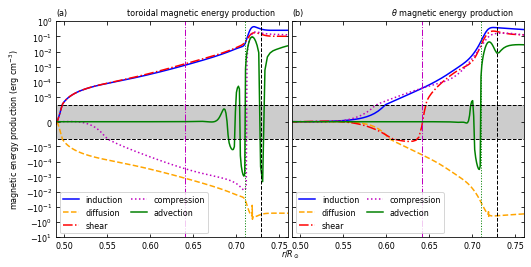

In [10]:
# make paper figure
# set some parameters
fontsize = 8
lw = 1

# r limit stuff
#rcut = r_ovshoot + 0.01
rcut = 0.76
pumpcut = 0.49 # I think this was a bad idea
ipumpcut = np.argmin(np.abs(rr - pumpcut))

# build figure
fig = plt.figure(figsize=(fig_width_inches, fig_height_inches))

ax1 = fig.add_axes((margin_left, margin_bottom, subplot_width, subplot_height))
ax2 = fig.add_axes((margin_left + margin_right + subplot_width, margin_bottom,\
        subplot_width, subplot_height), sharex=ax1, sharey=ax1)

# plot the production of B_phi

# plot the profiles
ordinate=0
ax1.plot(rr, indp, color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='induction')

ordinate += 1
ax1.plot(rr, diffp, color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='diffusion')

ordinate += 1
ax1.plot(rr, indp_shear, color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='shear')

#ordinate += 1
#ax1.plot(rr, indp_ms_exact, color=color_order[ordinate], linestyle=style_order[ordinate],\
#         label='mean shear')

#ordinate+=1
#ax1.plot(rr, indp_shear - indp_ms_exact, color=color_order[ordinate], linestyle=style_order[ordinate],\
#         label='non-axisym-\nmetric shear')

ordinate += 1
ax1.plot(rr[:ipumpcut], indp_comp[:ipumpcut], color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='compression')

ordinate += 1
ax1.plot(rr[:ipumpcut], indp_adv[:ipumpcut], color='g', linestyle=style_order[ordinate],\
         label='advection')

#ordinate += 1
#sump = indp + diffp
#ax1.plot(rr[:ipumpcut], sump[:ipumpcut], color=color_order[ordinate], linestyle=style_order[ordinate],\
#         label='sum')

#ordinate=6
#ax1.plot(rr, (indp_shear - indp_ms_exact), color=color_order[ordinate], linestyle=style_order[ordinate],\
#         label='non-axisym-\nmetric shear')


ax1.legend(fontsize=fontsize, loc='lower left', ncol=2, columnspacing=1.)

# add zero line (maybe) and linthresh (make this symlog)
#ax1.plot(rr, rr*0, 'k--', linewidth=lw)
linthresh = 3e-6
ax1.plot(rr, rr*0 - linthresh, 'k--', linewidth=lw)
ax1.plot(rr, rr*0 + linthresh, 'k--', linewidth=lw)
#ax1.text(0.6025, 0, 'linear scale', ha='left', va='center', fontsize=fontsize)
#ax1.text(0.65, 1e-4, 'log scale', ha='left', va='center', fontsize=fontsize)
#ax1.text(0.65, -1e-4, 'log scale', ha='left', va='center', fontsize=fontsize)

# set y limits
ymin, ymax = -10, 1
ax1.set_ylim(ymin, ymax)
ax1.set_ylabel('magnetic energy production (' + r'$\rm{erg\ cm^{-3}}$' + ')', fontsize=fontsize)

# add radial lines
yvals = np.linspace(ymin, ymax, 100)
count = 0
for rval in rvals_M:
    ax1.plot(rval + np.zeros(100), yvals, color=linecolors[count], linestyle=linestyles[count], linewidth=lw)
    count += 1

# set x limits
ax1.set_xlim(np.min(rr), rcut)
#ax1.set_xlabel(r'$r/R_\odot$', fontsize=fontsize)






# plot the production of B_theta

# plot the profiles
ordinate=0
ax2.plot(rr, indt, color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='induction')

ordinate += 1
ax2.plot(rr, difft, color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='diffusion')

ordinate += 1
ax2.plot(rr, indt_shear, color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='shear')

ordinate += 1
ax2.plot(rr[:ipumpcut], indt_comp[:ipumpcut], color=color_order[ordinate], linestyle=style_order[ordinate],\
         label='compression')

ordinate += 1
ax2.plot(rr[:ipumpcut], indt_adv[:ipumpcut], color='g', linestyle=style_order[ordinate],\
         label='advection')

#ordinate += 1
#sumt = indt + difft
#ax2.plot(rr[:ipumpcut], sumt[:ipumpcut], color=color_order[ordinate], linestyle=style_order[ordinate],\
#         label='sum')


ax2.legend(fontsize=fontsize, loc='lower left', ncol=2, columnspacing=1.)

# add zero line (maybe) and linthresh (make this symlog)
#ax2.plot(rr, rr*0, 'k--', linewidth=lw)
ax2.set_yscale('symlog', linthresh=linthresh)
ax2.plot(rr, rr*0 - linthresh, 'k--', linewidth=lw)
ax2.plot(rr, rr*0 + linthresh, 'k--', linewidth=lw)

# add radial lines
yvals = np.linspace(ymin, ymax, 100)
count = 0
for rval in rvals_M:
    ax2.plot(rval + np.zeros(100), yvals, color=linecolors[count], linestyle=linestyles[count], linewidth=lw)
    count += 1
    
# remove tick labels
plt.setp(ax2.get_yticklabels(), visible=False)
#ax2.set_yticklabels([])

# set x limits
#rcut = r_ovshoot + 0.01
#ax2.set_xlim(np.min(rr), rcut)
#ax2.set_xlabel(r'$r/R_\odot$', fontsize=fontsize)



# make labels
ax1.set_title('(a)', loc='left', fontsize=fontsize)
ax2.set_title('(b)', loc='left', fontsize=fontsize)

# put what we're plotting there too
buffspace = ' '*5
ax1.set_title('toroidal magnetic energy production' + buffspace, loc='right', fontsize=fontsize)
ax2.set_title(r'$\theta$' + ' magnetic energy production' + buffspace, loc='right', fontsize=fontsize)



# remove the annoying 10^-7 ticks (have no idea how I did this or why it makes sense)
yticks = ax1.get_yticks().tolist()
yticks.pop(6+int(np.log10(np.abs(ymin))))
yticks.pop(7+int(np.log10(np.abs(ymin))))
ax1.set_yticks(yticks)
#ax2.set_yticks(yticks)
ax1.set_ylim(ymin, ymax)

# add shade in 'linear region'
xvals = np.linspace(np.min(rr), rcut, 100)
for ax in ax1, ax2:
    ax.fill_between(xvals, xvals*0 - linthresh, xvals*0 + linthresh, fc="k", alpha=0.2)

    # point ticks inward and get them on all sides
    plt.sca(ax)
    plt.tick_params(top=True, right=True, direction='in', which='both', labelsize=fontsize)
plt.sca(ax1)
plt.minorticks_off()

# label both x axes
fig.text(margin_left + subplot_width + 0.5*margin_x, margin_y,\
         r'$r/R_\odot$', fontsize=fontsize, ha='center', va='bottom')

plt.savefig('images/meprod.png', dpi=300)

(0.0, 1.0)

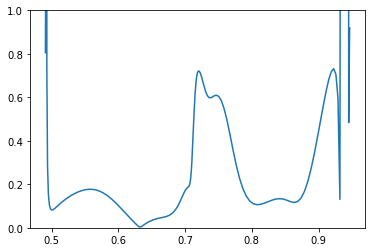

In [11]:
# now quantify how much shear is mean shear below overshoot layer

prof = np.abs((indp_shear - indp_ms_exact)/indp_shear)
plt.plot(rr, prof)
plt.ylim(0, 1)

In [12]:
# that's really not so bad

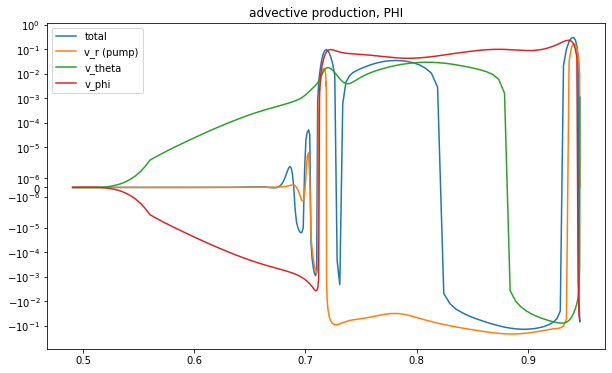

In [13]:
# Let's look at these advective bits more...
plt.figure(figsize=(10,6))
plt.title("advective production, PHI")
plt.plot(rr, indp_adv, label='total')
plt.plot(rr, indp_adv1, label='v_r (pump)')
plt.plot(rr, indp_adv2, label='v_theta')
plt.plot(rr, indp_adv3, label='v_phi')
plt.yscale('symlog', linthresh=linthresh)
plt.legend()

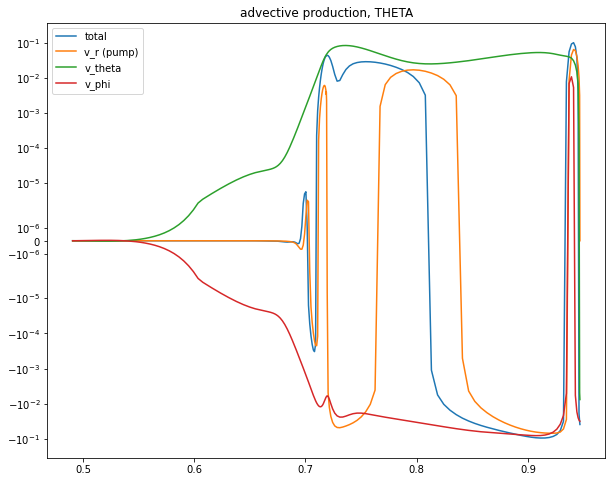

In [14]:
# Let's look at these advective bits more...
plt.figure(figsize=(10,8))
plt.title("advective production, THETA")
plt.plot(rr, indt_adv, label='total')
plt.plot(rr, indt_adv1, label='v_r (pump)')
plt.plot(rr, indt_adv2, label='v_theta')
plt.plot(rr, indt_adv3, label='v_phi')
plt.yscale('symlog', linthresh=linthresh)
plt.legend()

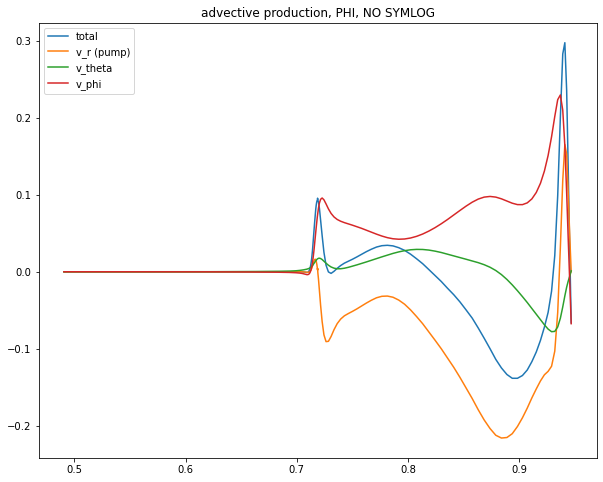

In [15]:
# Let's look at these advective bits more...
plt.figure(figsize=(10,8))
plt.title("advective production, PHI, NO SYMLOG")
plt.plot(rr, indp_adv, label='total')
plt.plot(rr, indp_adv1, label='v_r (pump)')
plt.plot(rr, indp_adv2, label='v_theta')
plt.plot(rr, indp_adv3, label='v_phi')
#plt.yscale('symlog', linthresh=linthresh)
plt.legend()

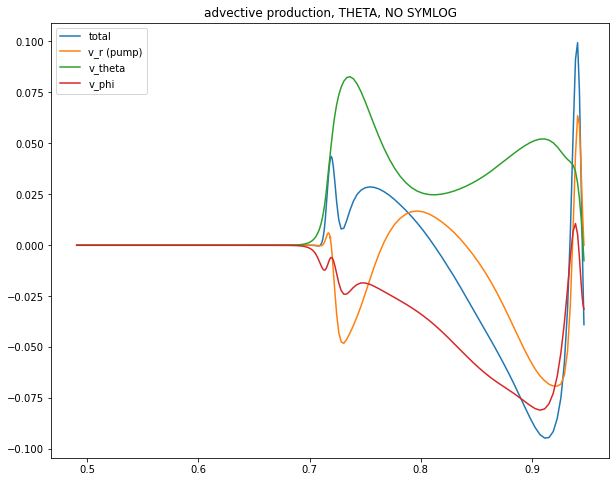

In [16]:
# Let's look at these advective bits more...
plt.figure(figsize=(10,8))
plt.title("advective production, THETA, NO SYMLOG")
plt.plot(rr, indt_adv, label='total')
plt.plot(rr, indt_adv1, label='v_r (pump)')
plt.plot(rr, indt_adv2, label='v_theta')
plt.plot(rr, indt_adv3, label='v_phi')
#plt.yscale('symlog', linthresh=linthresh)
plt.legend()

reading /nobackup/lmatilsk/case_M//data/AZ_Avgs-07802500_50220000.pkl


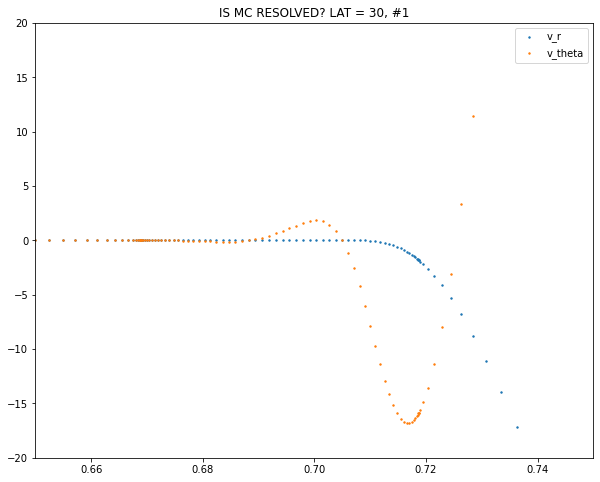

In [17]:
# let's plot fluctuations over meridional circulation

the_file = get_widest_range_file(datadir, 'AZ_Avgs') 
print ('reading ' + the_file)
di_az = get_dict(the_file)
vals_az = di_az['vals']
lut_az = di_az['lut']
tt_lat = get_grid_info(dirname)['tt_lat']
latchoose = 30
ichoose = np.argmin(np.abs(tt_lat - latchoose))
vr_az = vals_az[ichoose, :, lut_az[1]]
vt_az = vals_az[ichoose, :, lut_az[2]]

# first, make sure MC is resolved
plt.figure(figsize=(10,8))
plt.title("IS MC RESOLVED? LAT = 30, #1")
s=2
plt.scatter(rr, vr_az, label='v_r',s=s)
plt.scatter(rr, vt_az, label='v_theta',s=s)
#plt.yscale('symlog', linthresh=1e-3)
maxabs = 20
plt.ylim(-maxabs, maxabs)
plt.xlim(0.65, 0.75)
plt.legend()

reading /nobackup/lmatilsk/case_M//data/AZ_Avgs-07802500_50220000.pkl


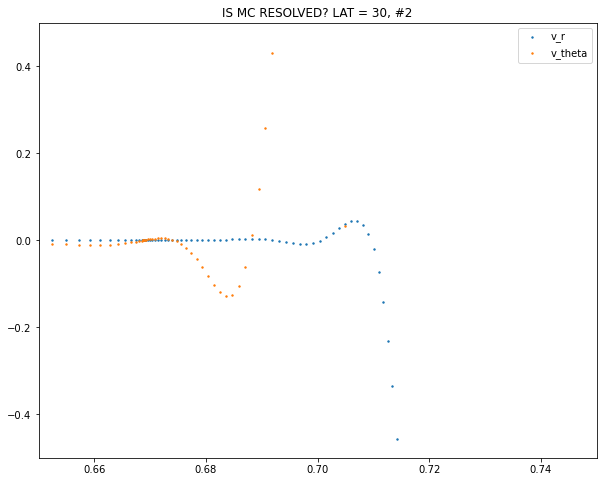

In [18]:
# let's plot fluctuations over meridional circulation

the_file = get_widest_range_file(datadir, 'AZ_Avgs') 
print ('reading ' + the_file)
di_az = get_dict(the_file)
vals_az = di_az['vals']
lut_az = di_az['lut']
tt_lat = get_grid_info(dirname)['tt_lat']
latchoose = 30
ichoose = np.argmin(np.abs(tt_lat - latchoose))
vr_az = vals_az[ichoose, :, lut_az[1]]
vt_az = vals_az[ichoose, :, lut_az[2]]

# first, make sure MC is resolved
plt.figure(figsize=(10,8))
plt.title("IS MC RESOLVED? LAT = 30, #2")
s=2
plt.scatter(rr, vr_az, label='v_r',s=s)
plt.scatter(rr, vt_az, label='v_theta',s=s)
#plt.yscale('symlog', linthresh=1e-3)
maxabs = 0.5
plt.ylim(-maxabs, maxabs)
plt.xlim(0.65, 0.75)
plt.legend()

In [19]:
# Plot v_r compared to indt_adv1, etc.
# due to mean flows

vr_az = vals_az[:, :, lut_az[1]]
tme_az = vals_az[:, :, lut_az[1103]]

dtmedr = drad(tme_az, rr*rsun)
pump_mc = -vr_az*dtmedr

gi = get_grid_info(dirname)
tw_2d = gi['tw_2d']
pump_mc_shav = np.sum(pump_mc*tw_2d, axis=0)

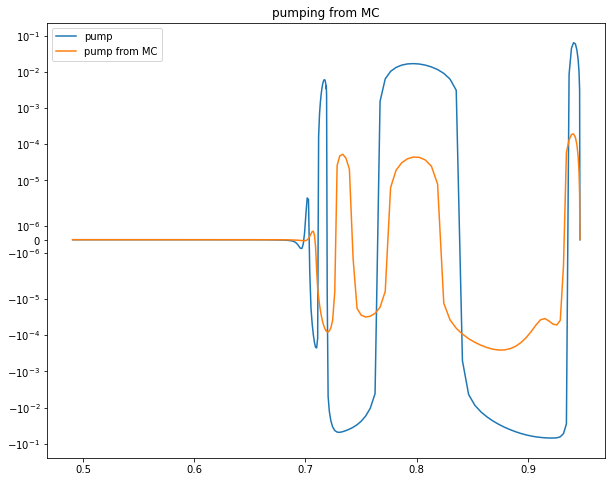

In [20]:
plt.figure(figsize=(10,8))
plt.title("pumping from MC")

plt.plot(rr, indt_adv1, label='pump')
plt.plot(rr, pump_mc_shav, label='pump from MC')
plt.legend()
plt.yscale('symlog', linthresh=linthresh)

In [21]:
help(drad)

Help on function drad in module common:

drad(arr, rr)



In [22]:
rr*rsun

array([6.58602090e+10, 6.58411047e+10, 6.58029421e+10, 6.57458131e+10,
       6.56698554e+10, 6.55752520e+10, 6.54622307e+10, 6.53310639e+10,
       6.51820676e+10, 6.50156006e+10, 6.48320640e+10, 6.46319000e+10,
       6.44155908e+10, 6.41836575e+10, 6.39366588e+10, 6.36751899e+10,
       6.33998805e+10, 6.31113939e+10, 6.28104252e+10, 6.24976993e+10,
       6.21739697e+10, 6.18400163e+10, 6.14966435e+10, 6.11446786e+10,
       6.07849696e+10, 6.04183829e+10, 6.00458017e+10, 5.96681237e+10,
       5.92862586e+10, 5.89011264e+10, 5.85136549e+10, 5.81247776e+10,
       5.77354314e+10, 5.73465541e+10, 5.69590826e+10, 5.65739504e+10,
       5.61920853e+10, 5.58144073e+10, 5.54418261e+10, 5.50752394e+10,
       5.47155304e+10, 5.43635655e+10, 5.40201927e+10, 5.36862393e+10,
       5.33625097e+10, 5.30497838e+10, 5.27488151e+10, 5.24603285e+10,
       5.21850191e+10, 5.19235502e+10, 5.16765515e+10, 5.14446182e+10,
       5.12283090e+10, 5.10281450e+10, 5.08446084e+10, 5.06781414e+10,
      

(1e-05, 10000.0)

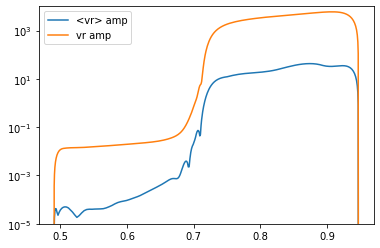

In [23]:
plt.plot(rr, np.sum(np.abs(vr_az)*tw_2d, axis=0), label='<vr> amp')
plt.plot(rr, np.sqrt(vals[:, 1, lut[1]]), label='vr amp')
plt.legend()
plt.yscale('log')
plt.ylim(1e-5, 1e4)

Text(0.5, 1.0, 'needed v_r to produce observed pumping (cm/s), #1')

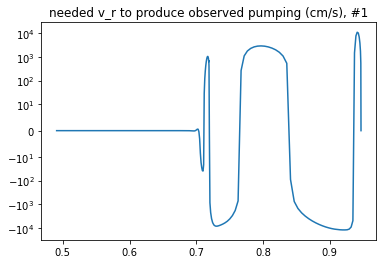

In [24]:
# Let's just do this order of magnitude ... what vr corresponds to the observed pumping and change in br?
# bt^2 varies by, say (1kG)^2 over the tachocline so 
dtmedr_oom = 1/8/np.pi*1000.**2/(0.1*rsun)
plt.plot(rr, indt_adv1/dtmedr_oom)
plt.yscale('symlog', linthresh=10)
plt.title("needed v_r to produce observed pumping (cm/s), #1")

In [25]:
# yeah...it's gotta the fluctuations causing these wiggles
# OK, now I don't know what the deal is...

Text(0.5, 1.0, 'needed v_r to produce observed pumping (cm/s), #2')

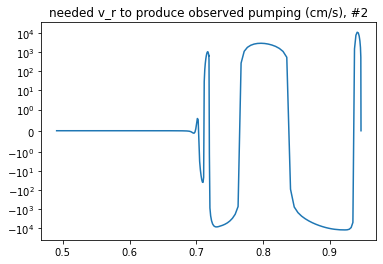

In [26]:
# Let's just do this order of magnitude ... what vr corresponds to the observed pumping and change in br?
# bt^2 varies by, say (1kG)^2 over the tachocline so 
dtmedr_oom = 1/8/np.pi*1000.**2/(0.1*rsun)
plt.plot(rr, indt_adv1/dtmedr_oom)
plt.yscale('symlog', linthresh=1)
plt.title("needed v_r to produce observed pumping (cm/s), #2")

In [27]:
# one more thing...just plot tme
# well no I basically already have...it's smooth